## Use opencv to run sobel operators on a grayscale image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

[[  0.  38. 292. ... 258.  28.   0.]
 [  0. 173. 365. ... 315. 143.   0.]
 [  0. 405. 356. ... 293. 346.   0.]
 ...
 [  0. 185. 191. ...  77. 234.   0.]
 [  0.  71. 169. ... 155. 207.   0.]
 [  0.   4. 112. ... 192. 166.   0.]]


Text(0.5,1,'Pixels have a value of 1 or 0 based on the strength of the x gradient. ')

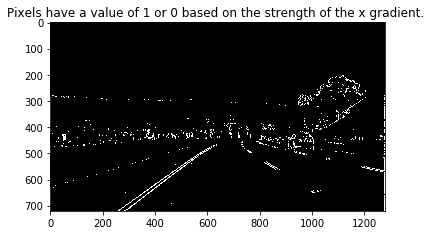

In [9]:
im = cv2.imread('curved-lane.jpg')

# mpimg uses RGB
# opencv uses BGR

def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    imgcopy = np.copy(img)
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2GRAY)
    
    assert orient== 'x' or orient=='y'
    
    sobel = None
    
    if orient == 'x':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    elif orient == 'y':
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

    abs_sobel = np.absolute(sobel)
    print(abs_sobel)
    #convert to 8-bit 0..255 image
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))

    #numpy zeros_like --> Returns an array of zeros with the same shape and type as a given array.
    '''
    thresh_min = 20
    thresh_max = 100
    '''
    
    #new image array with zeros
    sxbinary = np.zeros_like(scaled_sobel)
    
    #make anything with the inputted thresholds 1
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary
sobeled_image = abs_sobel_thresh(im,'x',20,100)
plt.imshow(sxbinary, cmap='gray')
plt.title("Pixels have a value of 1 or 0 based on the strength of the x gradient. ")

Text(0.5,1,'Pixels have a value of 1 or 0 based on the strength of the x gradient. ')

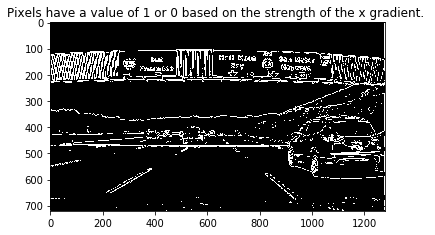

In [22]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    imgcopy = np.copy(img)
    
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_RGB2GRAY)    
    
    sobel = None
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    sobelx,sobely = np.square(sobelx), np.square(sobely)
    abs_sobelxy = np.absolute(np.sqrt(sobelx + sobely) )
    
    #convert to 8-bit 0..255 image
    scaled_sobel = np.uint8(255*abs_sobelxy/np.max(abs_sobelxy))

    thresh_min = mag_thresh[0]
    thresh_max = mag_thresh[1]    
    
    #new image array with zeros
    sxbinary = np.zeros_like(scaled_sobel)
    
    #make anything with the inputted thresholds 1
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

image_sobelxy = mpimg.imread("signs_vehicles_xygrad.png")
sobeled_image = mag_thresh(image_sobelxy, 3, (30, 100))
plt.imshow(sobeled_image, cmap='gray')
plt.title("Pixels have a value of 1 or 0 based on the strength of the x gradient. ")

In [25]:
def direction_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    imgcopy = np.copy(img)
    
    gray = cv2.cvtColor(imgcopy, cv2.COLOR_RGB2GRAY)    
    
    sobel = None
    
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    sobelx,sobely = np.absolute(sobelx), np.absolute(sobely)
    direction_of_gradient = np.arctan2( sobely, sobelx)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    scaled_sobel = np.uint8(255*direction_of_gradient/np.max(direction_of_gradient))

    thresh_min = thresh[0]
    thresh_max = thresh[1]    
    
    #new image array with zeros
    sxbinary = np.zeros_like(scaled_sobel)
    
    #make anything with the inputted thresholds 1
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return sxbinary

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    

Text(0.5,1,'Direction of the Gradient')

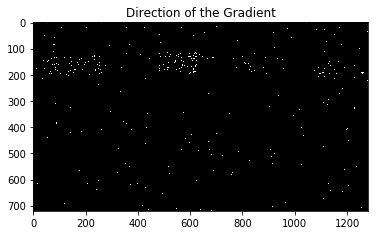

In [26]:
image_for_direction = mpimg.imread("signs_vehicles_xygrad.png")

#direction_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
sobeled_image = direction_threshold(image_for_direction, sobel_kernel=15, thresh=(0.7, 1.3))
plt.imshow(sobeled_image, cmap='gray')
plt.title("Direction of the Gradient")